Global variables

In [1]:
# ANSI escape codes for colored output
GREEN = "\033[92m"
BLUE = "\033[94m"
YELLOW = "\033[93m"
RED = "\033[91m"
RESET = "\033[0m"  # White

# La régression linéaire avec TensorFlow

Bienvenue dans ce notebook sur la régression linéaire avec TensorFlow !

## Comment Utiliser ce Tutoriel

- **Pratiquez en Même Temps** : Essayez de reproduire le code sur votre propre machine pendant que vous lisez.
- **Expérimentez** : N'hésitez pas à modifier le code et à observer comment cela affecte les résultats.
- **Posez des Questions** : Si quelque chose n'est pas clair, prenez le temps de faire des recherches supplémentaires ou de demander de l'aide.

---

Prêt à plonger dans le monde passionnant de la régression linéaire avec TensorFlow ? Commençons notre voyage d'apprentissage ensemble !

# Un Bref Rappel Théorique de la Régression Linéaire 

La régression linéaire est l'une des méthodes les plus fondamentales et largement utilisées en apprentissage automatique et en statistiques. Elle sert à modéliser la relation entre une variable dépendante continue et une ou plusieurs variables indépendantes. Cette section vise à rafraîchir vos connaissances théoriques sur la régression linéaire avant de passer à l'implémentation pratique avec TensorFlow.

## Qu'est-ce que la Régression Linéaire ?

La régression linéaire cherche à **établir une relation linéaire** entre les variables indépendantes (également appelées **features** ou **prédicteurs**) et la variable dépendante (également appelée **cible** ou **réponse**). En d'autres termes, elle vise à **prédire** la valeur de la variable cible en fonction des valeurs des variables prédictrices.

### Formulation Mathématique

Pour une seule variable indépendante (régression linéaire simple), le modèle peut être exprimé comme :

$
y = w x + b
$

- $ y $ : Variable dépendante (cible)
- $ x $ : Variable indépendante (feature)
- $ w $ : Coefficient (poids) du modèle
- $ b $ : Ordonnée à l'origine (biais)

Dans le cas de plusieurs variables indépendantes (régression linéaire multiple), le modèle devient :

$
y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$

![Régression linéaire](linear.png)

Ou, en notation vectorielle :

$
y = \mathbf{w}^\top \mathbf{x} + b
$

- $ \mathbf{x} $ : Vecteur des variables indépendantes
- $ \mathbf{w} $ : Vecteur des poids associés aux variables indépendantes

## Objectif de la Régression Linéaire

L'objectif est de **trouver les valeurs optimales des poids $ \mathbf{w} $ et du biais $ b $** qui minimisent la différence entre les valeurs prédites par le modèle et les valeurs réelles observées dans les données.

### Fonction de Coût

Pour quantifier cette différence, on utilise une **fonction de coût**. La fonction de coût la plus couramment utilisée pour la régression linéaire est **l'erreur quadratique moyenne** (Mean Squared Error, MSE) :

$$
J(\mathbf{w}, b) = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)} )^2
$$

- $ m $ : Nombre d'exemples dans le jeu de données
- $ y^{(i)} $ : Valeur réelle de la cible pour le $ i $-ème exemple
- $ \hat{y}^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b $ : Valeur prédite par le modèle pour le $ i $-ème exemple

### Optimisation

Pour minimiser la fonction de coût, on utilise des méthodes d'optimisation telles que **la descente de gradient**. L'idée est de mettre à jour les poids $ \mathbf{w} $ et le biais $ b $ de manière itérative en se déplaçant dans la direction opposée au gradient de la fonction de coût.

#### Mise à Jour des Poids et du Biais

$
\begin{align*}
w_j &:= w_j - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial w_j} \\
b &:= b - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b}
\end{align*}
$

- $ \alpha $ : Taux d'apprentissage (learning rate)
- $ \frac{\partial J}{\partial w_j} $ : Dérivée partielle de la fonction de coût par rapport au poids $ w_j $
- $ \frac{\partial J}{\partial b} $ : Dérivée partielle de la fonction de coût par rapport au biais $ b $

## Interprétation Géométrique

- **Régression Linéaire Simple** : La relation entre $ x $ et $ y $ est représentée par une **droite** dans un plan 2D.
- **Régression Linéaire Multiple** : La relation est représentée par un **hyperplan** dans un espace à n dimensions.

## Hypothèses de la Régression Linéaire

Pour que les estimations soient fiables, certaines hypothèses doivent être satisfaites :

1. **Linéarité** : La relation entre les variables indépendantes et dépendante est linéaire.
2. **Indépendance des Erreurs** : Les résidus (erreurs) sont indépendants les uns des autres.
3. **Homoscedasticité** : La variance des erreurs est constante pour toutes les valeurs des variables indépendantes.
4. **Normalité des Erreurs** : Les résidus sont distribués normalement.

## Avantages et Limitations

### Avantages

- **Simplicité** : Facile à comprendre et à interpréter.
- **Rapidité** : Peu coûteux en termes de calcul, adapté aux grands jeux de données.
- **Interprétabilité** : Les coefficients indiquent l'impact de chaque variable indépendante sur la variable dépendante.

### Limitations

- **Linéarité** : Incapable de capturer des relations non linéaires.
- **Sensibilité aux Outliers** : Les valeurs aberrantes peuvent fortement influencer le modèle.
- **Multicolinéarité** : La corrélation entre les variables indépendantes peut affecter la stabilité des estimations.

# Configuration de l'Environnement : Installation et Importation des Bibliothèques Nécessaires

Avant de pouvoir implémenter notre modèle de régression linéaire avec TensorFlow, nous devons configurer notre environnement en installant et en important les bibliothèques nécessaires.

## Étape 1 : Installation des Bibliothèques

Pour ce tutoriel, nous aurons besoin de plusieurs bibliothèques Python :

- **TensorFlow** : pour créer et entraîner notre modèle de régression linéaire.
- **Pandas** : pour la manipulation des données.
- **NumPy** : pour les calculs numériques.
- **Matplotlib** : pour la visualisation des données.
- **Scikit-Learn** : pour le prétraitement des données et le chargement de jeux de données.

### Installation via pip

Vous pouvez installer ces bibliothèques en utilisant la commande `pip`. Ouvrez votre terminal ou l'invite de commande et exécutez les commandes suivantes :

```bash
pip install tensorflow pandas numpy matplotlib scikit-learn
```

Assurez-vous que les installations se terminent sans erreur. Si vous utilisez un environnement virtuel (recommandé), assurez-vous d'activer cet environnement avant de procéder aux installations.

## Étape 2 : Importation des Bibliothèques

Une fois les bibliothèques installées, nous devons les importer dans notre notebook pour pouvoir les utiliser dans le code. Exécutez le code suivant dans une cellule Jupyter pour importer les bibliothèques :

```python
# Importation de TensorFlow
import tensorflow as tf

# Importation pour la manipulation des données et les calculs numériques
import pandas as pd
import numpy as np

# Importation pour la visualisation
import matplotlib.pyplot as plt

# Importation pour le prétraitement des données et le chargement de jeux de données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
```

## Explications des Bibliothèques Importées

- **TensorFlow (`tensorflow`)** : Utilisé pour construire et entraîner notre modèle de régression linéaire.
- **Pandas (`pandas`)** : Fournit des structures de données puissantes comme les DataFrames, facilitant la manipulation et l'analyse des données.
- **NumPy (`numpy`)** : Une bibliothèque pour les calculs scientifiques avec des tableaux multidimensionnels, utile pour les opérations mathématiques.
- **Matplotlib (`matplotlib.pyplot`)** : Permet de visualiser les données et les résultats du modèle.
- **Scikit-Learn (`sklearn`)** : Une bibliothèque dédiée à l'apprentissage automatique, que nous utiliserons pour :
  - Charger un jeu de données réel (`fetch_california_housing`).
  - Diviser les données en ensembles d’entraînement et de test (`train_test_split`).
  - Normaliser les données (`StandardScaler`).

## Vérification de l'Installation de TensorFlow

Pour vérifier que TensorFlow est bien installé et identifier si l'installation utilise un GPU (utile pour des calculs plus rapides), exécutez le code suivant :

```python
print("Version de TensorFlow :", tf.__version__)

# Vérifie si un GPU est disponible pour TensorFlow
if tf.config.list_physical_devices('GPU'):
    print("GPU disponible pour TensorFlow.")
else:
    print("GPU non disponible pour TensorFlow. Exécution sur CPU.")
```


In [2]:
#A vous de jouer

# Chargement et Exploration des Données 

Maintenant que l'environnement est configuré, nous allons charger et explorer un jeu de données, nous utiliserons un ensemble de données sur les prix de l'immobilier en Californie, accessible via Scikit-Learn.

1. **Chargement du Jeu de Données** : Utiliser `fetch_california_housing` de Scikit-Learn pour charger le jeu de données "California Housing" et afficher la description du jeu de données à l’aide de `print(housing.DESCR)`.

2. **Conversion en DataFrame** : Convertir les données du jeu de données en un DataFrame Pandas pour une manipulation plus aisée. Ajouter la variable cible (`MedHouseVal`) dans le DataFrame.

3. **Exploration Initiale des Données** :
   - Afficher les premières lignes du DataFrame avec `print(df.head())`.
   - Afficher des statistiques descriptives de base (moyenne, écart-type, min, max, etc.) avec `print(df.describe())`.
   - Vérifier la présence de valeurs manquantes avec `print(df.isnull().sum())`.

4. **Visualisation de la Variable Cible** : Créer un histogramme pour visualiser la distribution de la variable cible `MedHouseVal` (médiane des valeurs des maisons en Californie).

5. **Visualisation des Corrélations** : Créer une matrice de corrélation avec un heatmap pour visualiser les relations entre les caractéristiques et la variable cible, afin d'identifier les caractéristiques les plus pertinentes pour la modélisation. 

Chaque étape correspond à une exploration ou une préparation des données avant de passer à la modélisation.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Chargement du Jeu de Données
housing = fetch_california_housing()
print(f"{GREEN}Description du Jeu de Données :{RESET}\n")
print(housing.DESCR)

# 2. Conversion en DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target  # Ajout de la variable cible
print(f"\n{GREEN}DataFrame créé avec succès !{RESET}\n")

Description du Jeu de Données :

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 

In [4]:
# 3. Exploration Initiale des Données

# Afficher les premières lignes
print(f"{GREEN}Premières lignes du DataFrame :{RESET}")
print(df.head())

# Afficher des statistiques descriptives
print(f"\n{GREEN}Statistiques descriptives :{RESET}")
print(df.describe())

# Vérifier la présence de valeurs manquantes
print(f"\n{GREEN}Valeurs manquantes :{RESET}")
print(df.isnull().sum())

Premières lignes du DataFrame :
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Statistiques descriptives :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122  

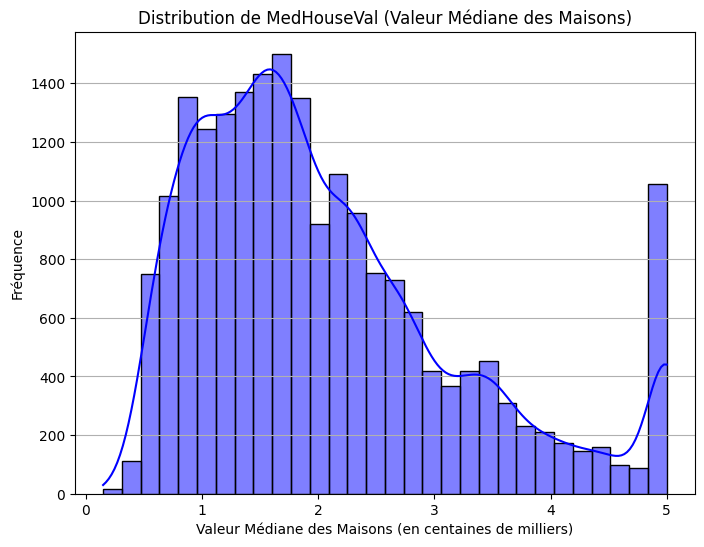

In [5]:
# 4. Visualisation de la Variable Cible

def plot_distribution(dataframe, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(dataframe[column], bins=30, kde=True, color="blue")
    plt.title("Distribution de MedHouseVal (Valeur Médiane des Maisons)")
    plt.xlabel("Valeur Médiane des Maisons (en centaines de milliers)")
    plt.ylabel("Fréquence")
    plt.grid(axis='y')
    plt.show()
    
plot_distribution(df, 'MedHouseVal')

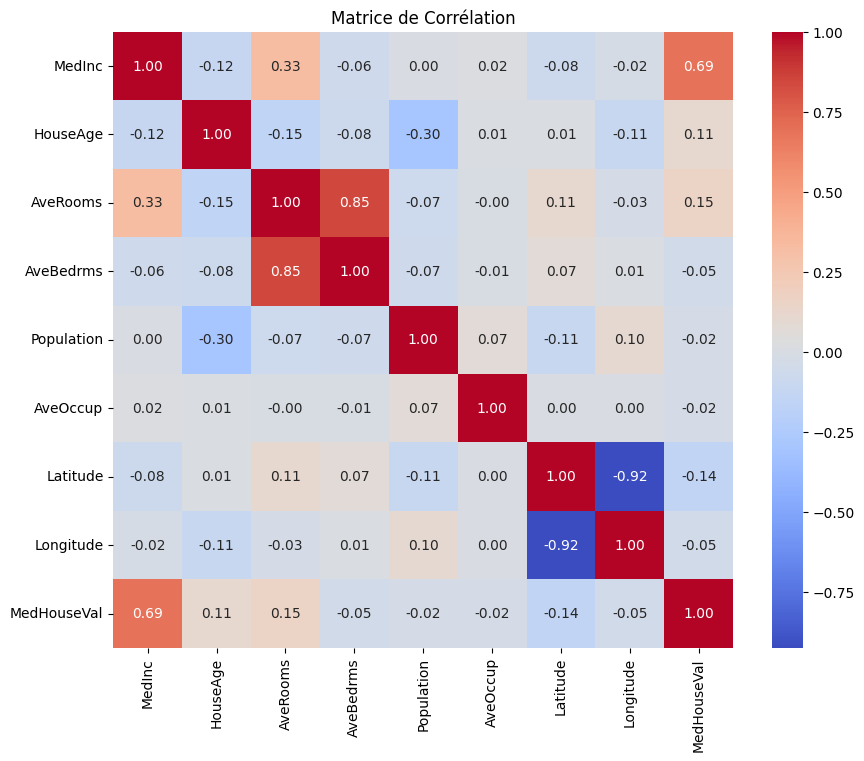

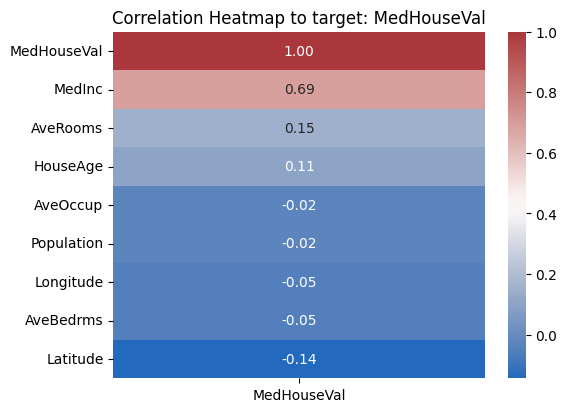

In [6]:
# 5. Visualisation des Corrélations

def target_correlation_matrix(dataframe, target_column):
    # Sélection des colonnes numériques
    numeric_cols = dataframe.select_dtypes(include=[np.number])

    # Calcul de la matrice de correlation
    correlation_matrix = numeric_cols.corr()

    # Correlation avec la cible
    correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)

    # Affichage
    plt.figure(figsize=(6, len(correlation_with_target) * 0.5))
    sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='vlag', fmt=".2f", cbar=True)
    plt.title(f'Correlation Heatmap to target: {target_column}')
    plt.show()

def plot_correlation_matrix(dataframe):
    plt.figure(figsize=(10, 8))
    correlation_matrix = dataframe.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matrice de Corrélation")
    plt.show()

plot_correlation_matrix(df)

target_correlation_matrix(df, "MedHouseVal")

# Prétraitement des Données : Normalisation et Division des Données en Ensembles d'Entraînement et de Test

Avant de construire notre modèle de régression linéaire, nous devons préparer nos données. Le prétraitement est une étape cruciale qui permet d'améliorer les performances du modèle en optimisant la manière dont les données sont présentées au modèle.

## Pourquoi Prétraiter les Données ?

1. **Normalisation** : Étant donné que nos caractéristiques sont sur des échelles différentes (par exemple, la population dans un quartier peut être de plusieurs milliers tandis que l'âge médian des maisons est en dizaines), il est essentiel de normaliser les données pour éviter que des caractéristiques ayant de plus grandes valeurs dominent le modèle.
2. **Division en Ensembles d'Entraînement et de Test** : Pour évaluer la performance du modèle de manière impartiale, nous séparons nos données en deux ensembles : un ensemble d’entraînement pour ajuster le modèle et un ensemble de test pour évaluer sa performance.
## Étape 1 : Séparation des Caractéristiques et de la Cible

Séparer les caractéristiques (features) de la variable cible (target) dans des variables différentes.

- **`X`** : Contient toutes les caractéristiques (sauf la colonne `MedHouseVal`).
- **`y`** : Contient la variable cible `MedHouseVal`.

## Étape 2 : Division des Données en Ensembles d'Entraînement et de Test

Diviser les données en deux parties : 80% pour l'entraînement et 20% pour le test. Cela permet de former le modèle sur la majorité des données tout en conservant une portion pour évaluer la performance du modèle.

- **`X_train`, `y_train`** : Ensemble d'entraînement utilisé pour ajuster le modèle.
- **`X_test`, `y_test`** : Ensemble de test utilisé pour évaluer la performance du modèle.

## Étape 3 : Normalisation des Caractéristiques

Normaliser les données pour garantir que toutes les caractéristiques sont sur une échelle similaire en utilisant le `StandardScaler` de Scikit-Learn, qui applique une transformation pour que chaque caractéristique ait une moyenne de 0 et un écart-type de 1.

- **`fit_transform`** : Calculer les paramètres de normalisation (moyenne et écart-type) à partir des données d'entraînement, puis appliquer la transformation.
- **`transform`** : Appliquer uniquement la transformation en utilisant les paramètres calculés à partir de l'ensemble d'entraînement.

**Remarque** : Appliquer le `fit_transform` uniquement sur les données d'entraînement pour garantir que les données de test restent indépendantes des données d'entraînement.

## Vérification de la Normalisation

Vérifier que la normalisation a bien été appliquée en affichant les statistiques de base de `X_train` après transformation.

La moyenne des caractéristiques normalisées devrait être proche de 0 et l'écart-type proche de 1.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Séparation des Caractéristiques et de la Cible
X = df.drop(columns=['MedHouseVal'])  # Toutes les caractéristiques sauf la cible
y = df['MedHouseVal']  # La variable cible

print(f"{GREEN}Séparation des données :{RESET}")
print(f"{BLUE}Caractéristiques (X) :{RESET} {X.shape}")
print(f"{BLUE}Variable cible (y) :{RESET} {y.shape}\n")

# 2. Division des Données en Ensembles d'Entraînement et de Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"{GREEN}Division des données :{RESET}")
print(f"{BLUE}X_train :{RESET} {X_train.shape}, {BLUE}y_train :{RESET} {y_train.shape}")
print(f"{BLUE}X_test :{RESET} {X_test.shape}, {BLUE}y_test :{RESET} {y_test.shape}\n")

Séparation des données :
Caractéristiques (X) : (20640, 8)
Variable cible (y) : (20640,)

Division des données :
X_train : (16512, 8), y_train : (16512,)
X_test : (4128, 8), y_test : (4128,)



In [8]:
# 3. Normalisation des Caractéristiques
scaler = StandardScaler()

# Normalisation des ensembles d'entraînement et de test
X_train_normalized = scaler.fit_transform(X_train)  # Ajustement et transformation sur l'ensemble d'entraînement
X_test_normalized = scaler.transform(X_test)  # Transformation sur l'ensemble de test

In [9]:
# Conversion en DataFrame pour une meilleure lisibilité
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

print(f"{GREEN}Normalisation des données :{RESET}")
print(f"{BLUE}Statistiques après normalisation (X_train) :{RESET}\n")
print(X_train_normalized_df.describe())

# Vérification que la moyenne est proche de 0 et l'écart-type est proche de 1
means = X_train_normalized_df.mean(axis=0).round(2)
stds = X_train_normalized_df.std(axis=0).round(2)
print(f"\n{GREEN}Vérification de la normalisation :{RESET}")
print(f"{BLUE}Moyennes des caractéristiques normalisées :{RESET}\n{means}")
print(f"{BLUE}Écart-types des caractéristiques normalisées :{RESET}\n{stds}")

Normalisation des données :
Statistiques après normalisation (X_train) :

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean  -6.519333e-17 -9.251859e-18 -1.981081e-16 -1.707291e-16 -2.151595e-19   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -1.775438e+00 -2.190766e+00 -1.904386e+00 -1.762117e+00 -1.251913e+00   
25%   -6.900689e-01 -8.417859e-01 -4.118373e-01 -2.081645e-01 -5.606339e-01   
50%   -1.758995e-01  3.108328e-02 -8.350905e-02 -1.094160e-01 -2.281865e-01   
75%    4.686502e-01  6.658972e-01  2.621376e-01  8.455177e-03  2.634487e-01   
max    5.839268e+00  1.856173e+00  5.716655e+01  5.664727e+01  3.012743e+01   

           AveOccup      Latitude     Longitude  
count  1.651200e+04  1.651200e+04  1.651200e+04  
mean   4.936566e-17  6.400995e-17  1.753335e-15  
std    1.000030e+00  1.000030e+00  1.000030e+00  
min   -2.07684

# Construction et Compilation du Modèle : Création d'un Modèle de Régression Linéaire avec TensorFlow

Maintenant que nos données sont prêtes, nous allons construire et compiler notre modèle de régression linéaire en utilisant TensorFlow. Cette étape consiste à définir l'architecture de notre modèle et à choisir un optimiseur, une fonction de coût et des métriques pour l'entraînement.

## Comprendre l'Architecture de Base du Modèle

Pour une régression linéaire, notre modèle se compose d'une simple couche linéaire (ou couche dense) sans activation. Cette couche prendra les caractéristiques d'entrée (features) et produira une prédiction continue, qui est une estimation de notre variable cible (prix des maisons).

### Structure du Modèle

- **Entrée** : Notre modèle prendra un vecteur de caractéristiques (par exemple, surface des logements, population, nombre de chambres).
- **Couche de sortie** : Une seule couche dense avec une seule unité (neurone) pour fournir une sortie continue.

## Étape 1 : Création du Modèle

Nous allons utiliser l'API Keras de TensorFlow pour construire notre modèle de manière séquentielle.

```python
import tensorflow as tf

# Création du modèle
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),  # Définir la forme d'entrée
    tf.keras.layers.Dense(1)  # Couche de sortie linéaire avec une unité
])
```

### Explication du Code

- `tf.keras.Sequential` : Permet de créer un modèle en empilant les couches de manière séquentielle.
- `tf.keras.Input(shape=(X_train.shape[1],))` : Spécifie la forme des entrées du modèle, correspondant au nombre de caractéristiques dans `X_train`.
- `tf.keras.layers.Dense(1)` : Ajoute une couche dense avec une unité de sortie pour prédire une valeur continue.

## Étape 2 : Compilation du Modèle

La compilation est une étape importante qui configure le modèle pour l'entraînement. Nous devons spécifier :

- **Optimiseur** : Nous utiliserons l'optimiseur `Adam`, souvent choisi pour sa rapidité de convergence et sa stabilité.
- **Fonction de Coût** : Pour la régression linéaire, la perte MSE (Mean Squared Error, ou erreur quadratique moyenne) est couramment utilisée pour mesurer l'écart entre les prédictions et les valeurs réelles.
- **Métrique d'Évaluation** : Nous utiliserons `MAE` (Mean Absolute Error, ou erreur absolue moyenne), qui est souvent plus interprétable que la MSE, car elle donne la moyenne des écarts absolus en unités de la variable cible.

```python
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
```

### Explication du Code

- `optimizer='adam'` : Adam est un algorithme d'optimisation efficace pour ce type de problème.
- `loss='mse'` : MSE (Mean Squared Error) est utilisée pour calculer l'erreur quadratique moyenne entre les prédictions et les valeurs réelles, ce qui est adapté aux problèmes de régression.
- `metrics=['mae']` : MAE (Mean Absolute Error) est ajoutée pour évaluer le modèle en donnant l'erreur moyenne absolue des prédictions.

## Vérification de l'Architecture du Modèle

Il est toujours utile de vérifier la structure du modèle pour s'assurer que tout est configuré correctement. La commande `model.summary()` affiche un résumé des couches, des dimensions de sortie, et du nombre total de paramètres.

```python
# Afficher le résumé du modèle
model.summary()
```

## Résumé de cette Étape

1. **Construction du Modèle** : Nous avons créé un modèle séquentiel avec une seule couche dense pour effectuer une prédiction de régression.
2. **Compilation du Modèle** : Nous avons configuré le modèle avec un optimiseur `Adam`, une fonction de coût `MSE`, et une métrique `MAE` pour évaluer les performances pendant l'entraînement.


In [13]:
import tensorflow as tf

# 1. Création du Modèle
print(f"{BLUE}Construction du Modèle :{RESET}")
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),  # Définir la forme d'entrée
    tf.keras.layers.Dense(1)  # Couche de sortie linéaire avec une unité
])
print(f"{GREEN}Modèle créé avec succès !{RESET}\n")

# 2. Compilation du Modèle
print(f"{BLUE}Compilation du Modèle :{RESET}")
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(f"{GREEN}Modèle compilé avec succès !{RESET}\n")

# 3. Vérification de l'Architecture du Modèle
print(f"{BLUE}Résumé de l'Architecture du Modèle :{RESET}")
model.summary()

Construction du Modèle :
Modèle créé avec succès !

Compilation du Modèle :
Modèle compilé avec succès !

Résumé de l'Architecture du Modèle :


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

# Entraînement du Modèle

Maintenant que notre modèle est construit et compilé, nous allons l’entraîner en utilisant les données d'entraînement. L’entraînement est le processus où le modèle ajuste ses poids pour minimiser l'erreur entre les prédictions et les valeurs réelles.

## Étape 1 : Définir le Nombre d'Époques et la Taille de Batch

- **Nombre d'itérations (epochs)** : Le nombre de fois que le modèle passe sur l’ensemble des données d'entraînement. Un nombre plus élevé d’époques permet au modèle d’apprendre davantage, mais peut aussi mener à un surapprentissage (overfitting) s’il est trop élevé.
- **Taille de batch (batch size)** : Le nombre d'échantillons traités avant la mise à jour des poids du modèle. Des tailles de batch plus petites permettent des mises à jour plus fréquentes mais peuvent augmenter le temps de calcul.

Pour commencer, nous allons définir 50 époques et une taille de batch de 32, ce qui est raisonnable pour un modèle simple de régression linéaire.

## Étape 2 : Entraîner le Modèle

Nous utilisons la méthode `fit` de Keras pour entraîner notre modèle. Nous allons également utiliser une fraction des données d'entraînement comme validation pour surveiller la performance du modèle et détecter d'éventuels signes de surapprentissage.

```python
# Entraînement du modèle
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,           # Nombre d'itérations
    batch_size=32,       # Taille de batch
    validation_split=0.2 # Fraction des données d'entraînement pour la validation
)
```

### Explication du Code

- `X_train` et `y_train` : Les données d'entraînement (caractéristiques et cible).
- `epochs=50` : Le modèle passera 50 fois sur l’ensemble des données d'entraînement.
- `batch_size=32` : Après chaque groupe de 32 échantillons, les poids du modèle sont mis à jour.
- `validation_split=0.2` : 20 % des données d'entraînement sont réservées pour la validation, ce qui nous permet de suivre la performance du modèle sur des données "nouvelles" pendant l’entraînement.

## Étape 3 : Suivi de la Convergence

L'objet `history` contient les informations d'apprentissage du modèle (valeurs de perte et métrique) pour chaque époque. Nous pouvons l'utiliser pour visualiser la convergence de notre modèle et surveiller les performances sur les ensembles d'entraînement et de validation.

### Visualisation des Courbes de Perte

Pour mieux comprendre comment le modèle apprend, traçons les courbes de perte (MSE) pour les ensembles d'entraînement et de validation. Cela nous aide à repérer tout signe de surapprentissage si la perte de validation commence à augmenter pendant que celle de l'entraînement diminue.

```python
import matplotlib.pyplot as plt

# Tracé des courbes de perte
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.title("Convergence de la Perte du Modèle")
plt.show()
```

### Visualisation des Courbes de l'Erreur Absolue Moyenne (MAE)

Nous pouvons également tracer les courbes de MAE pour voir comment l'erreur moyenne absolue évolue au fil des époques.

```python
# Tracé des courbes de MAE
plt.plot(history.history['mae'], label='MAE d\'entraînement')
plt.plot(history.history['val_mae'], label='MAE de validation')
plt.xlabel('Époques')
plt.ylabel('Erreur absolue moyenne (MAE)')
plt.legend()
plt.title("Évolution de l'Erreur Absolue Moyenne (MAE)")
plt.show()
```

Ces graphiques nous donnent une indication sur la façon dont le modèle s’améliore (ou non) au fur et à mesure de l'entraînement. Un écart important entre les performances d'entraînement et de validation peut indiquer un surapprentissage.

## Résumé de l'Étape d'Entraînement

1. **Définition des paramètres** : Nous avons défini un nombre d'époques et une taille de batch pour contrôler la vitesse d'apprentissage du modèle.
2. **Entraînement du modèle** : Nous avons utilisé `model.fit` pour ajuster les poids du modèle sur l'ensemble d'entraînement.
3. **Suivi de la convergence** : Nous avons tracé les courbes de perte et de MAE pour évaluer la progression du modèle pendant l'entraînement.

Dans la prochaine section, nous allons évaluer la performance du modèle sur l'ensemble de test pour vérifier sa capacité de généralisation.

Entraînement du Modèle :
Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.6737 - mae: 2.0650 - val_loss: 4.8178 - val_mae: 1.7326
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2154 - mae: 1.6052 - val_loss: 3.0753 - val_mae: 1.3606
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0271 - mae: 1.2721 - val_loss: 2.0544 - val_mae: 1.0548
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8607 - mae: 0.9809 - val_loss: 1.4404 - val_mae: 0.8194
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2005 - mae: 0.7715 - val_loss: 1.0885 - val_mae: 0.6683
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0554 - mae: 0.6521 - val_loss: 0.8923 - val_mae: 0.5930
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8331 - mae: 0.5812 - val_loss: 0.7896 - val_mae: 0.5644
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6420 - mae: 0.5551 - val_loss: 0.7333 - val_mae: 0.5563
Epoch 9/50
413/413 ━━━━━━━━━━━━

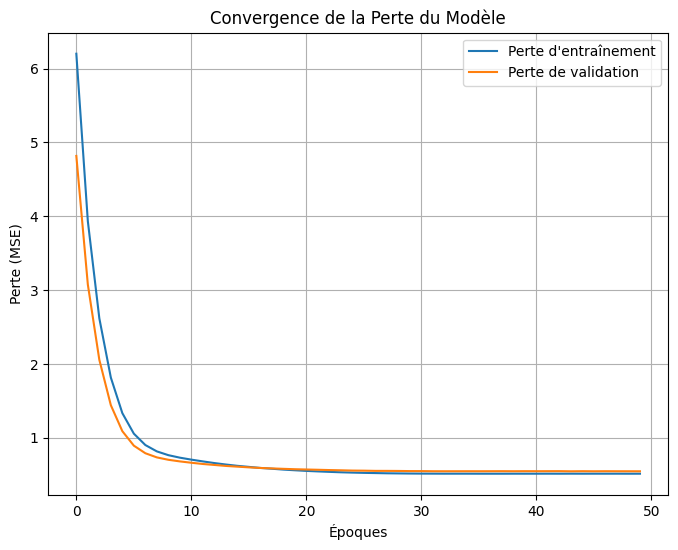

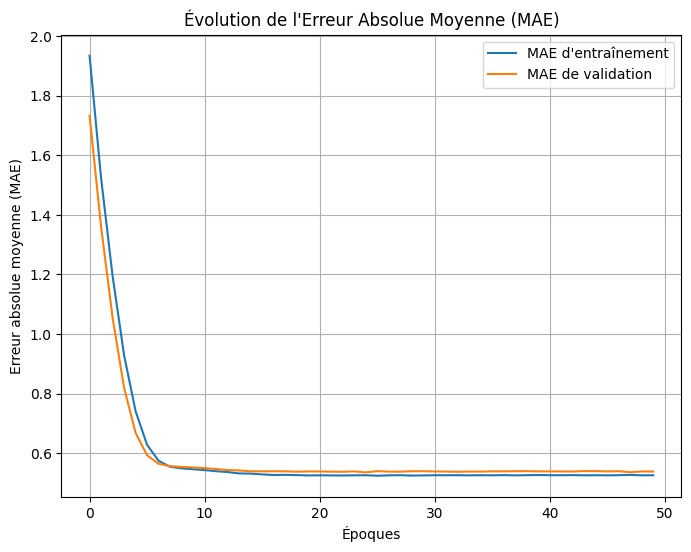

In [14]:
import matplotlib.pyplot as plt

# Function to plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Perte d\'entraînement')
    plt.plot(history.history['val_loss'], label='Perte de validation')
    plt.xlabel('Époques')
    plt.ylabel('Perte (MSE)')
    plt.legend()
    plt.title("Convergence de la Perte du Modèle")
    plt.grid(True)
    plt.show()

# Function to plot training and validation MAE
def plot_mae(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['mae'], label='MAE d\'entraînement')
    plt.plot(history.history['val_mae'], label='MAE de validation')
    plt.xlabel('Époques')
    plt.ylabel('Erreur absolue moyenne (MAE)')
    plt.legend()
    plt.title("Évolution de l'Erreur Absolue Moyenne (MAE)")
    plt.grid(True)
    plt.show()

# Entraînement du modèle
print(f"{BLUE}Entraînement du Modèle :{RESET}")
history = model.fit(
    X_train_normalized, 
    y_train, 
    epochs=50,           # Nombre d'itérations
    batch_size=32,       # Taille de batch
    validation_split=0.2 # Fraction des données d'entraînement pour la validation
)

print(f"{GREEN}Entraînement terminé avec succès !{RESET}\n")

# Tracer les courbes de convergence
print(f"{BLUE}Visualisation des Courbes de Convergence :{RESET}")
plot_loss(history)
plot_mae(history)

# Évaluation du Modèle : Mesure de la Performance du Modèle sur les Données de Test

Après avoir entraîné notre modèle, nous devons évaluer sa performance sur un ensemble de données indépendant, appelé **ensemble de test**. Cela nous permet de vérifier si le modèle a bien généralisé et peut faire des prédictions précises sur des données qu'il n'a jamais vues.

## Pourquoi Évaluer sur l’Ensemble de Test ?

Pendant l’entraînement, le modèle apprend à minimiser l’erreur sur l’ensemble d’entraînement, mais il est important de vérifier que cette performance se traduit également sur des données nouvelles. Si le modèle fonctionne bien sur les données de test, cela indique qu'il n'a pas **surappris** (overfitting) et qu'il est capable de généraliser.

## Étape 1 : Évaluation sur l’Ensemble de Test

Nous utilisons la méthode `evaluate` pour calculer les valeurs de la perte (MSE) et de la métrique (MAE) sur l’ensemble de test. Cela nous donnera une idée claire de l'erreur moyenne que nous pouvons attendre du modèle.

```python
# Évaluation du modèle sur l'ensemble de test
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Perte (MSE) sur l'ensemble de test : {test_loss}")
print(f"Erreur absolue moyenne (MAE) sur l'ensemble de test : {test_mae}")
```

### Explication des Résultats

- **MSE (Mean Squared Error)** : La perte MSE indique l'erreur quadratique moyenne, mesurant à quel point les prédictions s'éloignent des valeurs réelles en moyenne.
- **MAE (Mean Absolute Error)** : La MAE est l'erreur moyenne absolue, qui indique directement la différence moyenne en unités de la variable cible entre les prédictions et les valeurs réelles. Elle est plus intuitive car elle est en unités de la variable cible.

Des valeurs basses pour ces métriques indiquent que le modèle prédit les valeurs avec une bonne précision. Des valeurs plus élevées peuvent indiquer que le modèle a encore besoin d’améliorations.

## Étape 2 : Visualisation des Prédictions vs Valeurs Réelles

Pour mieux comprendre la performance du modèle, visualisons les valeurs prédites par le modèle par rapport aux valeurs réelles sur l'ensemble de test. Cela nous permet de voir si le modèle suit bien la tendance des données.

```python
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Tracé des valeurs réelles vs prédictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs Prédictions')
plt.show()
```

### Interprétation du Graphique

- **Nuage de points** : Chaque point représente une observation, avec la valeur réelle sur l'axe x et la prédiction sur l'axe y.
- **Ligne de référence** : La ligne diagonale représente les points où la prédiction est exactement égale à la valeur réelle. Plus les points sont proches de cette ligne, plus les prédictions sont précises.

Si les points sont dispersés loin de la ligne, cela indique que le modèle a des difficultés à prédire précisément certaines valeurs.

## Résumé de l'Évaluation

1. **Calcul de la Perte et de la MAE sur le Test** : Nous avons mesuré la performance du modèle en termes de MSE et MAE pour évaluer la précision de ses prédictions.
2. **Visualisation des Prédictions** : Nous avons tracé les prédictions du modèle par rapport aux valeurs réelles pour observer visuellement la qualité de ses prédictions.

Dans la dernière section, nous conclurons en passant en revue les points clés de notre travail et en discutant de potentielles améliorations.

Évaluation du Modèle sur l'Ensemble de Test :
Perte (MSE) sur l'ensemble de test : 0.5581
Erreur absolue moyenne (MAE) sur l'ensemble de test : 0.5329

Prédictions sur l'Ensemble de Test :
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Visualisation des Prédictions vs Valeurs Réelles :


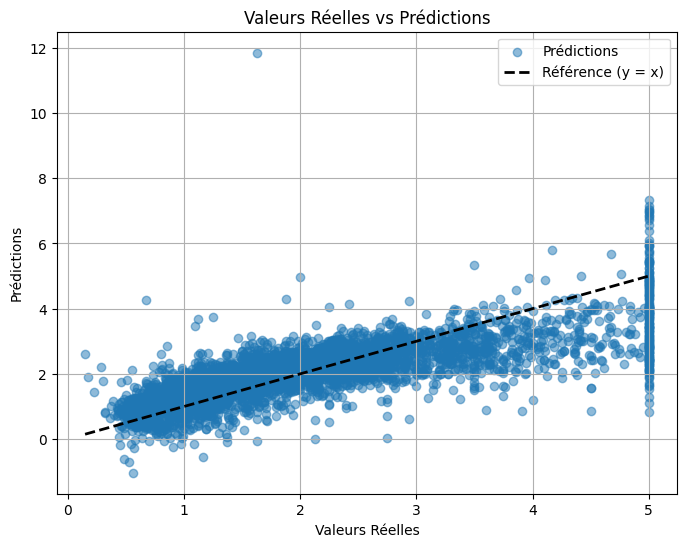

In [15]:
# Function to evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    print(f"{BLUE}Évaluation du Modèle sur l'Ensemble de Test :{RESET}")
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)  # Silent evaluation
    print(f"{GREEN}Perte (MSE) sur l'ensemble de test :{RESET} {test_loss:.4f}")
    print(f"{GREEN}Erreur absolue moyenne (MAE) sur l'ensemble de test :{RESET} {test_mae:.4f}\n")
    return test_loss, test_mae

# Function to visualize predictions vs. actual values
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Prédictions")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Référence (y = x)")
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.title('Valeurs Réelles vs Prédictions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Évaluation du modèle
test_loss, test_mae = evaluate_model(model, X_test_normalized, y_test)

# Prédictions sur l'ensemble de test
print(f"{BLUE}Prédictions sur l'Ensemble de Test :{RESET}")
y_pred = model.predict(X_test_normalized)

# Visualisation des prédictions vs valeurs réelles
print(f"{BLUE}Visualisation des Prédictions vs Valeurs Réelles :{RESET}")
plot_predictions(y_test, y_pred.flatten())

# Exercices

Pour appliquer la régression linéaire, plusieurs jeux de données sont intégrés dans les bibliothèques **scikit-learn** et **TensorFlow**.

1. **Diabetes** :
   - Description : Utilisé pour prédire la progression de la maladie du diabète un an après une première observation.
   - Utilisation : `from sklearn.datasets import load_diabetes`
   - Variables : 10 caractéristiques médicales (IMC, âge, pression artérielle, etc.) avec une cible quantitative.

2. **Auto MPG** :
   - Description : Prédiction de la consommation de carburant des voitures.
   - Utilisation : Disponible via `http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data`
   - Variables : Caractéristiques des véhicules (nombre de cylindres, poids, etc.) et consommation.

3. **Concrete Compressive Strength** :
   - Description : Prédiction de la résistance à la compression du béton en fonction de sa composition.
   - Utilisation : Disponible via `https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls`
   - Variables : Propriétés des matériaux utilisés dans le béton (quantités de composants, âge du béton).

4. **Wine Quality** :
   - Description : Peut être utilisé pour la régression pour prédire la qualité du vin sur une échelle de 0 à 10.
   - Utilisation : Disponible via `https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv`.
   - Variables : Caractéristiques chimiques des vins (acidité, sucre, pH, etc.).
